In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
'''
def dimension_2_random_walk(X):
    for U in range(1,5):
        U = np.random.randint(U) + 1
    
    if U == 1:
        X[0] += 1
    if U == 2:
        X[0] -= 1
    if U == 3:
        X[1] += 1
    if U == 4:
        X[1] += 1
        '''
        
def dimension_2_random_walk(X):
    U = np.random.random()
    if U > 0.5:
        if U > 0.75:
            X[0] += 1
        else:
            X[0] -= 1
    else:
        if U > 0.25:
            X[1] += 1
        else:
            X[1] -= 1

In [2]:
n = 30000
X = [0,0]
trajectoire = []
trajectoire.append(tuple(X))
longueurs = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:
    
    dimension_2_random_walk(X)
    
    if tuple(X) in trajectoire:
        longueurs.append(longueur)
        nbr_sections += 1
        longueur = 0
    else:
        longueur += 1
    
    trajectoire.append(tuple(X))

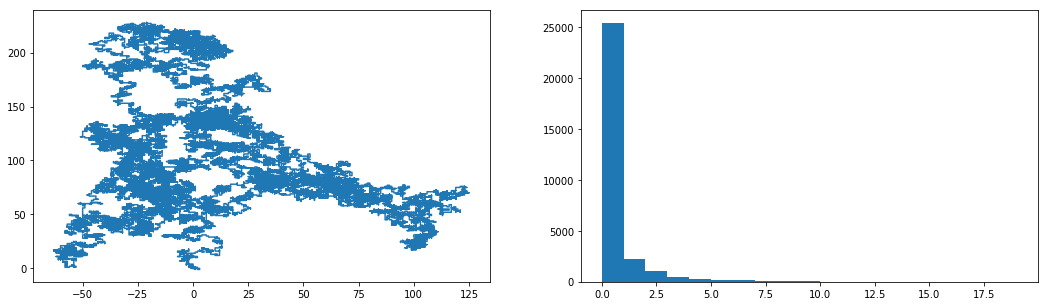

In [3]:
x = list()
y = list()

for i in range(len(trajectoire)):
    x.append(trajectoire[i][0])
    y.append(trajectoire[i][1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1.plot(x,y)
ax2.hist(longueurs,bins=range(20))
plt.show()

In [4]:
proportions = []

for i in range(30):
    proportions.append({})
    for n in range(10):
        proportions[i][n] = longueurs[i*1000:(i+1)*1000].count(n)/10

In [5]:
import pandas as pd
proportions = pd.DataFrame(proportions)

In [6]:
proportions.describe()

,0,1,2,3,4,5,6,7,8,9
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,84.656667,7.336667,3.426667,1.616667,1.060000,0.683333,0.456667,0.256667,0.173333,0.130000
std,4.906272,1.904710,1.211990,0.713942,0.560542,0.469103,0.321294,0.207918,0.165952,0.120773
min,75.600000,4.000000,1.200000,0.400000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.450000,6.700000,2.700000,1.200000,0.625000,0.325000,0.200000,0.100000,0.100000,0.025000
50%,85.150000,7.200000,3.200000,1.600000,1.000000,0.500000,0.400000,0.250000,0.150000,0.100000
75%,87.950000,8.700000,4.350000,2.000000,1.300000,1.075000,0.600000,0.375000,0.200000,0.200000
max,92.600000,10.600000,5.600000,3.200000,2.500000,1.900000,1.100000,0.700000,0.600000,0.500000


# Q2.

In [7]:

def liste_aleatoire(d,k):
    '''Fonction qui renvoie une liste composée de k 1, k 2, …, k (2d) dans
    un ordre aléatoire.'''
    liste_directions = []
    for i in range(2*d):
        liste_directions = liste_directions + k*[i+1]

    for t in range(2*d*k):
        '''On génère I aléatoire uniformément dans t, t+1, …, 12'''
        I = np.random.randint(t,2*d*k+1)
        a = liste_directions[t]
        liste_directions[t] = liste_directions[I-1]
        liste_directions[I-1] = a

    return liste_directions

In [8]:
''' Exemple '''
liste_aleatoire(2,3)

[2, 1, 3, 2, 1, 3, 4, 4, 4, 2, 1, 3]

In [17]:
11%2

1

In [36]:
d = 3
k = 3

n = 3000
X = [[0 for i in range(d)] for t in range(2*d*k)]
trajectoires = [[0 for i in range(d)] for t in range(2*d*k)]

longueurs = [[] for t in range(2*d*k)]
nbr_sections = [0 for t in range(2*d*k)]
longueur = [0 for t in range(2*d*k)]

while nbr_sections[0] < n:
    
    '''On calcule la liste aléatoire qui va définir le mouvement de chacune
    des 2*d*k trajectoires'''
    liste_alea = liste_aleatoire(d,k)
    
    for i in range(len(trajectoires)):
        
        
        X[i][((liste_alea[i]-1)//2)-1] += 2*((liste_alea[i] % 2) - 0.5)
    
        if tuple(X[i]) in trajectoires[i]:
            longueurs[i].append(longueur[i])
            nbr_sections[i] += 1
            longueur[i] = 0
        else:
            longueur[i] += 1
    
        trajectoires[i].append(tuple(X[i]))
    

In [37]:
X

[[25.0, -472.0, 548.0],
 [-54.0, 101.0, 626.0],
 [23.0, 28.0, -490.0],
 [-38.0, -132.0, -469.0],
 [119.0, 103.0, -531.0],
 [474.0, 150.0, 31.0],
 [481.0, -90.0, 26.0],
 [582.0, 101.0, 80.0],
 [-448.0, -44.0, 59.0],
 [-546.0, 72.0, 19.0],
 [-496.0, -2.0, 83.0],
 [1.0, 531.0, -63.0],
 [4.0, 601.0, -66.0],
 [65.0, 727.0, 25.0],
 [-6.0, -386.0, 125.0],
 [-36.0, -479.0, 16.0],
 [-35.0, -407.0, -75.0],
 [-115.0, -402.0, 56.0]]

In [38]:
trajectoires[1]

[0,
 0,
 0,
 (-1.0, 0, 0),
 (0.0, 0, 0),
 (0.0, 0, 1.0),
 (-1.0, 0, 1.0),
 (-1.0, -1.0, 1.0),
 (-1.0, -2.0, 1.0),
 (-1.0, -2.0, 2.0),
 (-1.0, -2.0, 1.0),
 (0.0, -2.0, 1.0),
 (1.0, -2.0, 1.0),
 (1.0, -3.0, 1.0),
 (1.0, -3.0, 2.0),
 (1.0, -4.0, 2.0),
 (1.0, -4.0, 3.0),
 (2.0, -4.0, 3.0),
 (3.0, -4.0, 3.0),
 (2.0, -4.0, 3.0),
 (2.0, -3.0, 3.0),
 (2.0, -3.0, 4.0),
 (2.0, -3.0, 5.0),
 (2.0, -2.0, 5.0),
 (2.0, -3.0, 5.0),
 (2.0, -4.0, 5.0),
 (1.0, -4.0, 5.0),
 (1.0, -5.0, 5.0),
 (1.0, -4.0, 5.0),
 (1.0, -4.0, 4.0),
 (1.0, -5.0, 4.0),
 (2.0, -5.0, 4.0),
 (2.0, -5.0, 3.0),
 (3.0, -5.0, 3.0),
 (3.0, -6.0, 3.0),
 (3.0, -7.0, 3.0),
 (3.0, -8.0, 3.0),
 (4.0, -8.0, 3.0),
 (4.0, -7.0, 3.0),
 (4.0, -7.0, 4.0),
 (5.0, -7.0, 4.0),
 (6.0, -7.0, 4.0),
 (6.0, -7.0, 5.0),
 (6.0, -7.0, 6.0),
 (7.0, -7.0, 6.0),
 (7.0, -7.0, 5.0),
 (7.0, -8.0, 5.0),
 (6.0, -8.0, 5.0),
 (5.0, -8.0, 5.0),
 (5.0, -9.0, 5.0),
 (5.0, -9.0, 6.0),
 (6.0, -9.0, 6.0),
 (6.0, -9.0, 5.0),
 (6.0, -9.0, 6.0),
 (6.0, -9.0, 7.0),
 (6.0, -9.

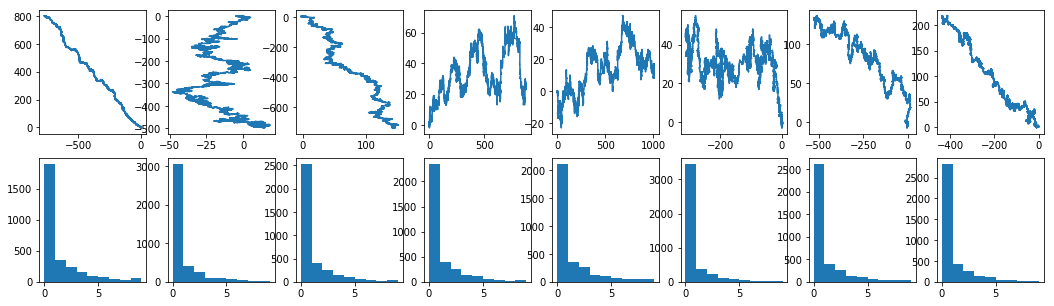

In [93]:
# Tracé des graphes pour k = d = 2

fig, (ax1,ax2) = plt.subplots(2,8,figsize = (18,5))

for t in range(8):
    x = list()
    y = list()

    for i in range(len(trajectoires[0])):
        x.append(trajectoires[t][i][0])
        y.append(trajectoires[t][i][1])

    ax1[t].plot(x,y)
    ax2[t].hist(longueurs[t],bins=range(10))
plt.show()

# Q3.

In [143]:
''' Idée : on code une marche aléatoire à peu près comme la premiere. Seulement, quand on arrive à une
longueur égale à une longueur définie, on va la continuer de n façons différentes, chacune de ces nouvelles
trajectoires s'arrêtant dès qu'il y a un croisement.'''

import copy

seuil = 7
n_rep = 10

n = 2000
X = [0,0]
trajectoire = []
trajectoire.append(tuple(X))
longueurs = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:
    
    dimension_2_random_walk(X)
    
    if tuple(X) in trajectoire:
        trajectoire.append(tuple(X))
        longueur = 0
    else:
        trajectoire.append(tuple(X))
        longueur += 1
        
        if longueur == seuil:
            position_init = copy.deepcopy(X)
            i = 0
            nouv_trajectoires = [[] for t in range(n_rep)]
            while i < n_rep :
                
                dimension_2_random_walk(X)
                
                if tuple(X) in trajectoire + nouv_trajectoires[i]:
                    longueurs.append(longueur)
                    nbr_sections += 1
                    i += 1
                    X = copy.deepcopy(position_init)
                    longueur = seuil
                        
                else:
                    nouv_trajectoires[i].append(tuple(X))
                    longueur += 1
    

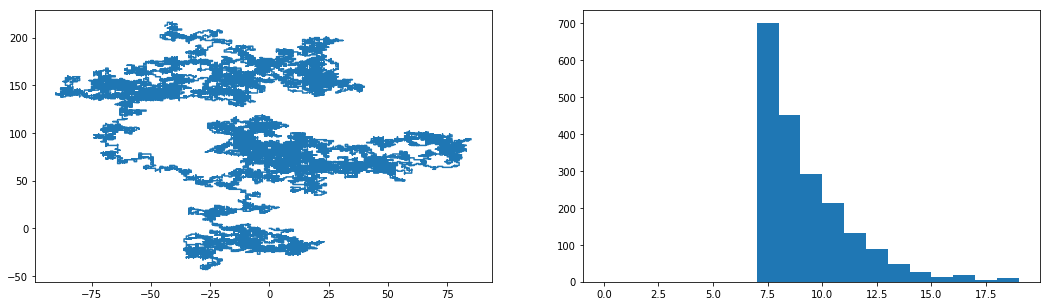

In [144]:
x = list()
y = list()

for i in range(len(trajectoire)):
    x.append(trajectoire[i][0])
    y.append(trajectoire[i][1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1.plot(x,y)
ax2.hist(longueurs,bins=range(20))
plt.show()